In [8]:
import sys
sys.path.insert(0, '/home/shenwanxiang/Research/bidd-clsar/')

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from math import sqrt
import pandas as pd
import numpy as np

import torch
import torch.nn.functional as F
from rdkit import Chem

from torch_geometric.loader import DataLoader
from torch_geometric.datasets import MoleculeNet
from torch_geometric.nn.models import AttentiveFP

from clsar.dataset import LSSInhibitor # dataset
from clsar.feature import Gen115AtomFeatures, GenAttentiveFeatures # feature
from clsar.model import ACNet_GCN, ACNet_GIN, ACNet_GAT, ACNet_PNA # model
from clsar.model.loss import ada_batch_all_triplet_loss, ada_batch_all_triplet_loss2

In [10]:
Dataset =  LSSInhibitor # MoleculeNet


In [16]:
dataset = Dataset(root = './tmpignore/', name='klk5', pre_transform=Gen115AtomFeatures())

In [19]:
data = dataset[-2]

In [20]:
data

Data(x=[28, 115], edge_index=[2, 58], edge_attr=[58, 10], y=[1, 1], smiles='CCOc1cc(NCc2nc(-c3ccccc3)c[nH]2)ccc1C(=N)N.O=CO')

In [22]:
data.x.shape

torch.Size([28, 115])

In [23]:
data.y.shape

torch.Size([1, 1])

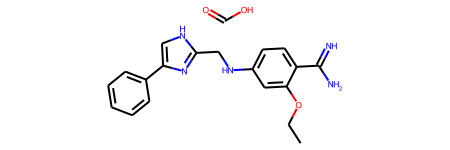

In [27]:
mol = Chem.MolFromSmiles(data.smiles)
mol

In [28]:
mol.GetNumAtoms()

28